<a href="https://colab.research.google.com/github/appravi18/PCA/blob/main/PCA_USD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import datetime as dt
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-notebook')
import seaborn as sns
sns.set_style('darkgrid')
sns.set_context("talk")

In [ ]:
def get_data():
  all_data = []
  for i in range(10,23):
    year = str(2000+i)
    url1 = 'https://home.treasury.gov/resource-center/data-chart-center/interest-rates/daily-treasury-rates.csv/'+year+'/all?type=daily_treasury_yield_curve&field_tdr_date_value='+year+'page&_format=csv'
    data = pd.read_csv(url1)
    all_data.append(data)

  pd_alldata = pd.concat(all_data,ignore_index=True)
  pd_alldata['Date'] = pd.to_datetime(pd_alldata['Date'])
  pd_alldata.index = pd_alldata['Date']
   
  req_cols = ['3 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr', '7 Yr','10 Yr', '20 Yr', '30 Yr']
  final = pd_alldata[req_cols]

  return final

In [ ]:
final = get_data()

In [ ]:
final.head()

,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,
2010-12-31,0.12,0.19,0.29,0.61,1.02,2.01,2.71,3.30,4.13,4.34
2010-12-30,0.12,0.20,0.29,0.66,1.07,2.06,2.76,3.38,4.21,4.43
2010-12-29,0.13,0.20,0.30,0.64,1.05,2.03,2.75,3.35,4.19,4.41
2010-12-28,0.15,0.21,0.31,0.75,1.17,2.18,2.89,3.50,4.33,4.53
2010-12-27,0.17,0.22,0.32,0.71,1.11,2.08,2.76,3.36,4.20,4.42


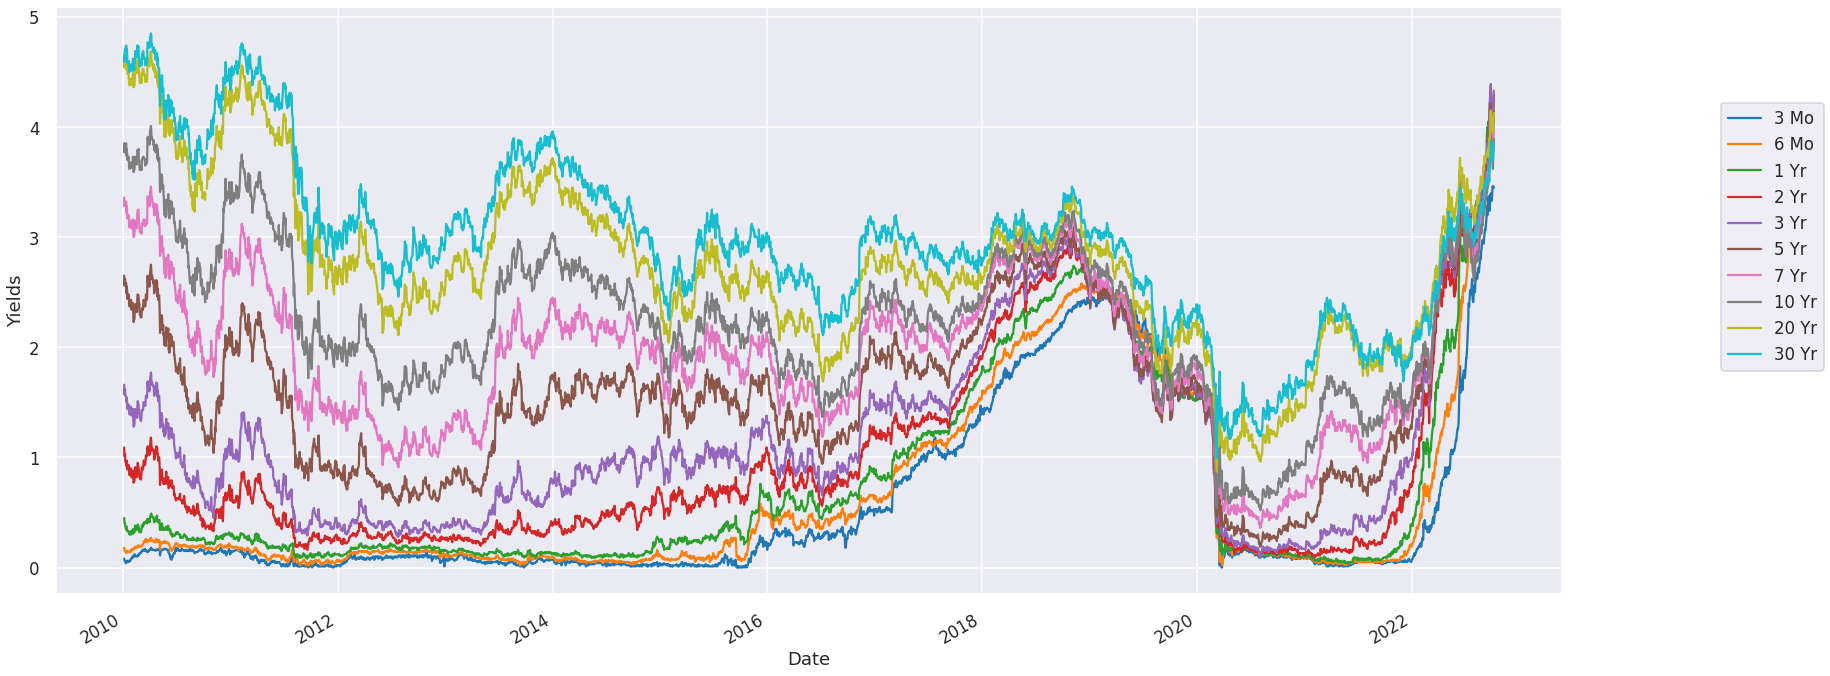

In [ ]:
final.plot(figsize=(27,12))
plt.ylabel("Yields")
plt.legend(bbox_to_anchor=(1.1, 0.85), loc=2)
plt.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, StandardScaler

In [ ]:
df_normalized_mean = pd.DataFrame(scale(final))

In [ ]:
df_normalized_mean.dropna(inplace=True)

In [ ]:
instruments = final.columns

In [ ]:
pca = PCA(n_components=len(instruments))

In [ ]:
YC_PCA = pca.fit_transform(df_normalized_mean)

In [ ]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)] 


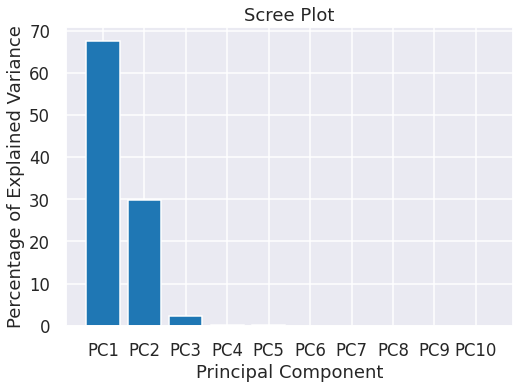

In [ ]:
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
#plt.plot(x=range(1, len(per_var)+1), pca.explained_variance_ratio_.cumsum()*100)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot');

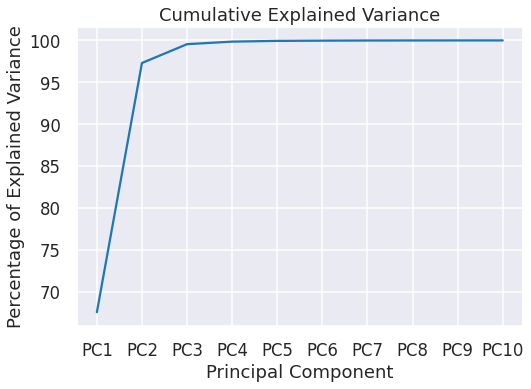

In [ ]:
plt.plot(labels, pca.explained_variance_ratio_.cumsum()*100)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Cumulative Explained Variance');

In [ ]:
PC1, PC2, PC3 = pca.components_[0],pca.components_[1],pca.components_[2]

In [ ]:
NumComponents = 3

topPorfolios = pd.DataFrame(pca.components_[:NumComponents],columns=instruments)

eigenPortfolios = topPorfolios.div(topPorfolios.sum(1),axis=0)
#eigenPortfolios.index = [ f'Portfolio {i}' for i in range(NumComponents)]
eigenPortfolios.index = ['Level', 'Slope', 'Curvature']

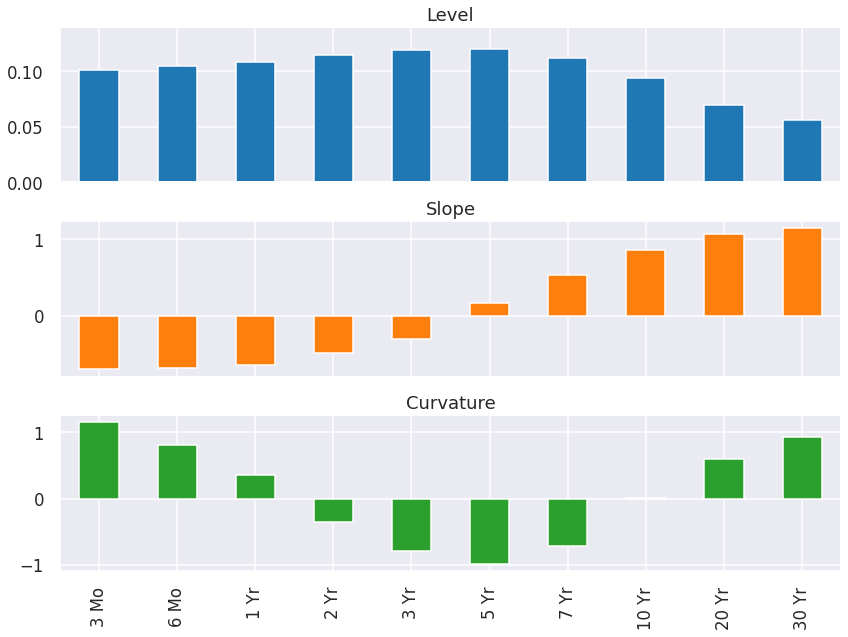

In [ ]:
axs = eigenPortfolios.T.plot.bar(subplots=True,figsize=(14,10),legend=False)
plt.subplots_adjust(hspace=0.25)
axs[0].set_ylim(0,.14);

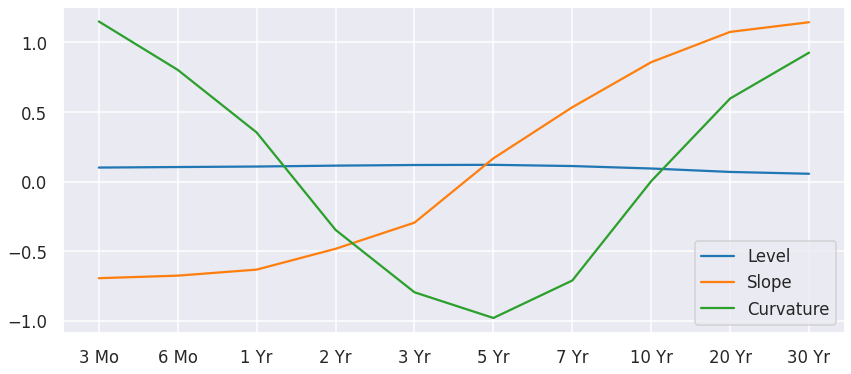

In [ ]:
axs = eigenPortfolios.T.plot(subplots=False,figsize=(14,6),legend=True);
axs.set_xticks(range(len(instruments)))
axs.set_xticklabels(instruments);